In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.shape

(8124, 23)

In [5]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


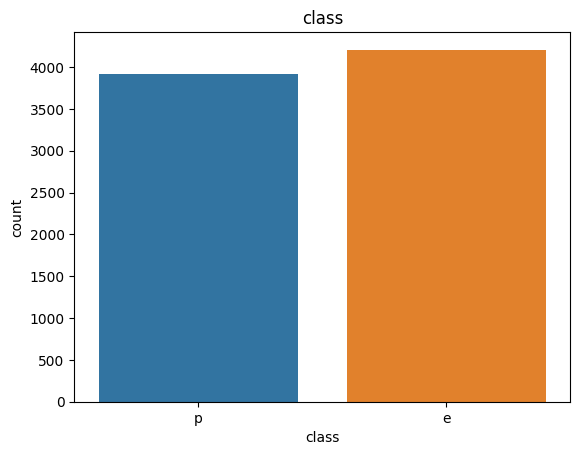

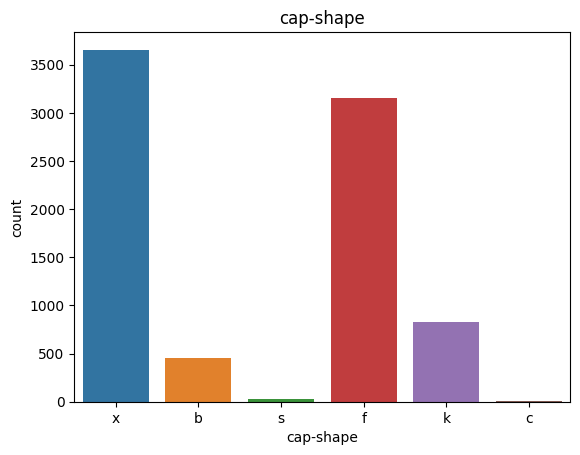

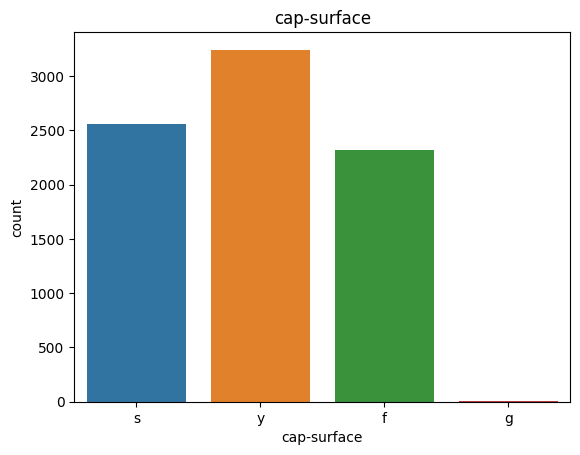

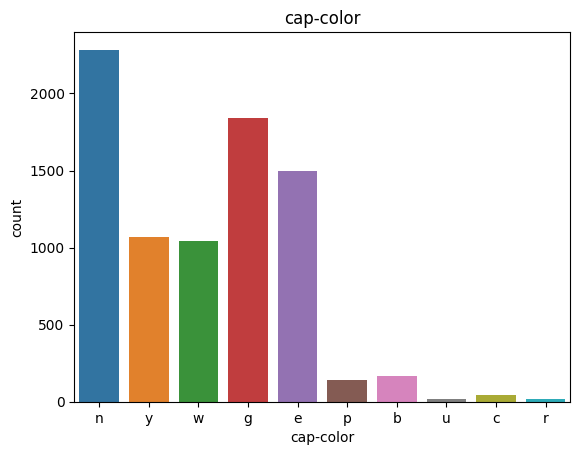

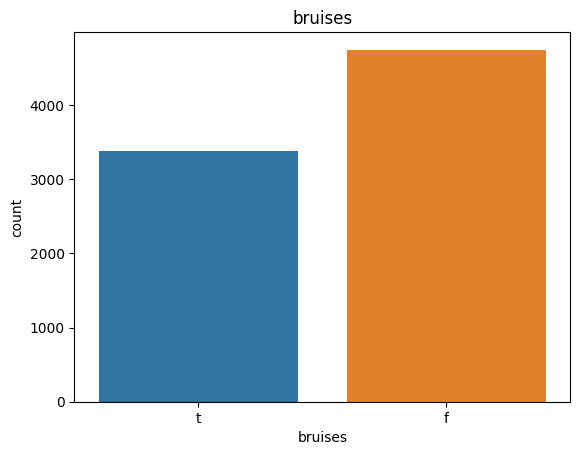

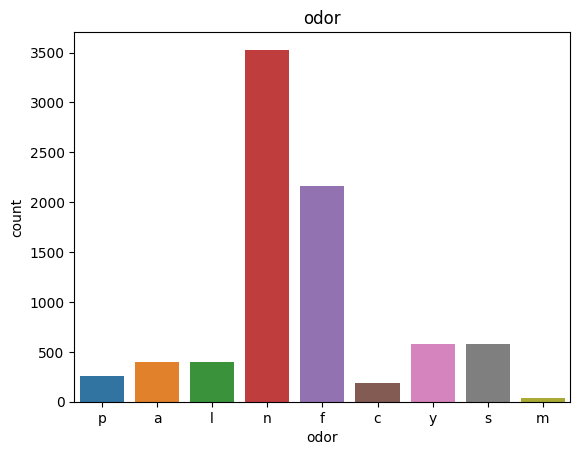

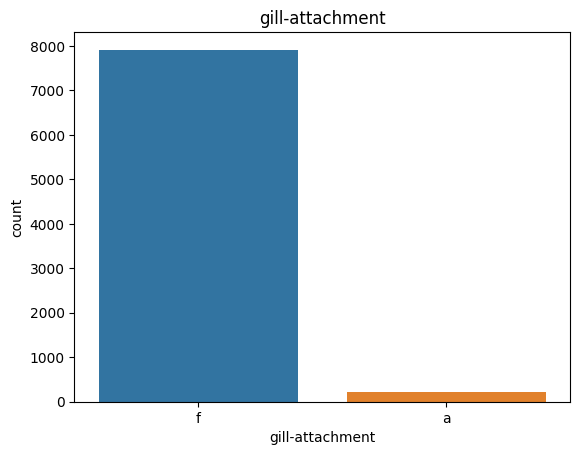

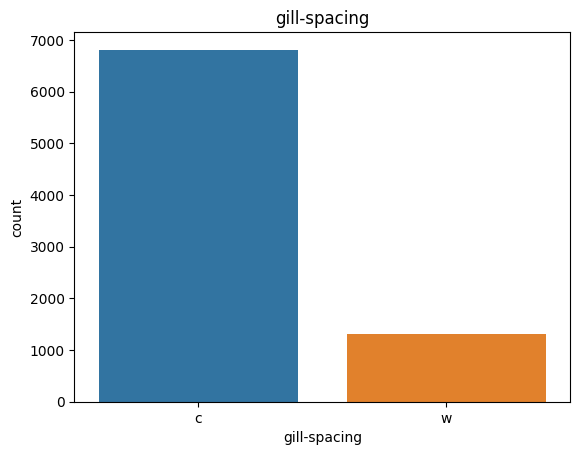

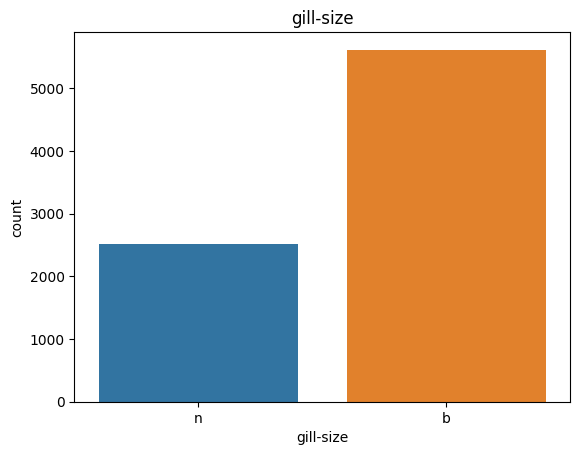

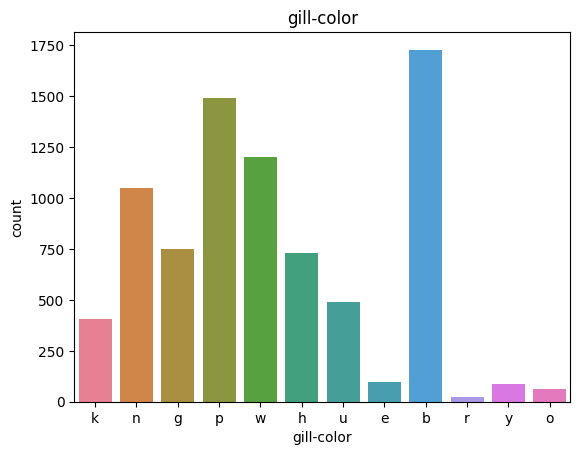

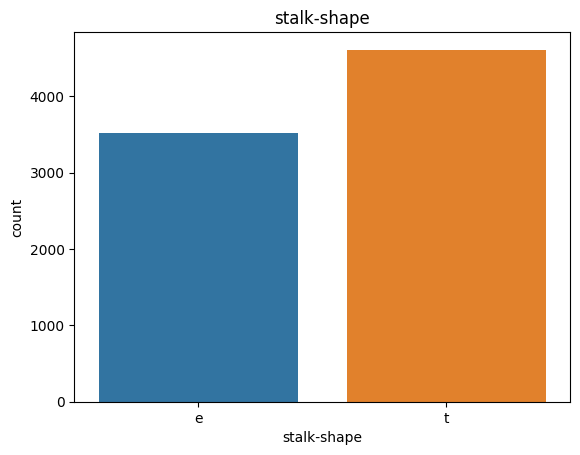

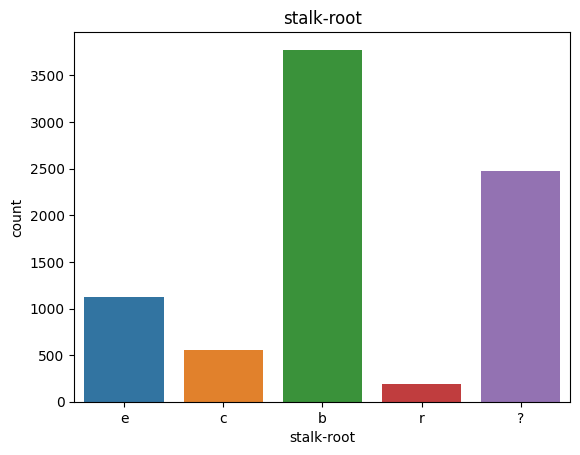

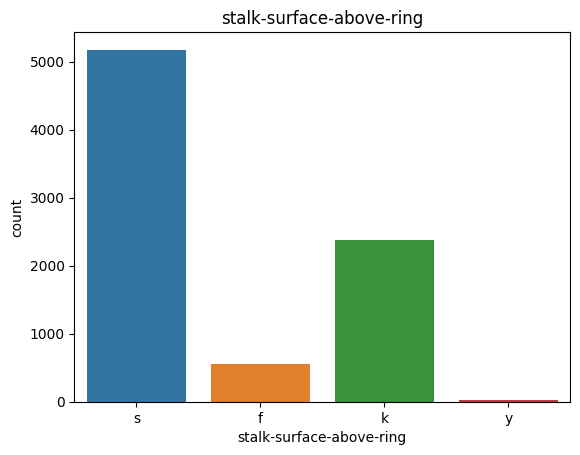

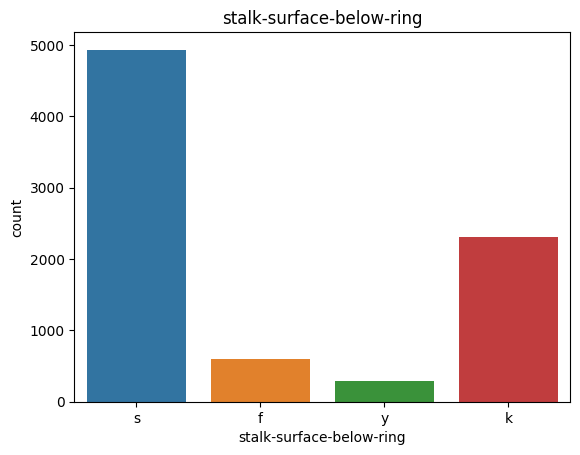

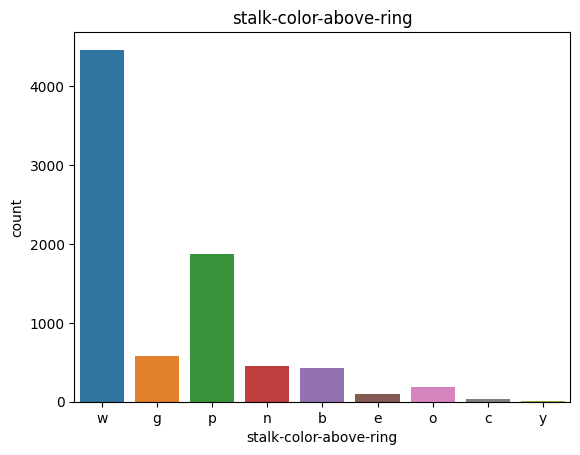

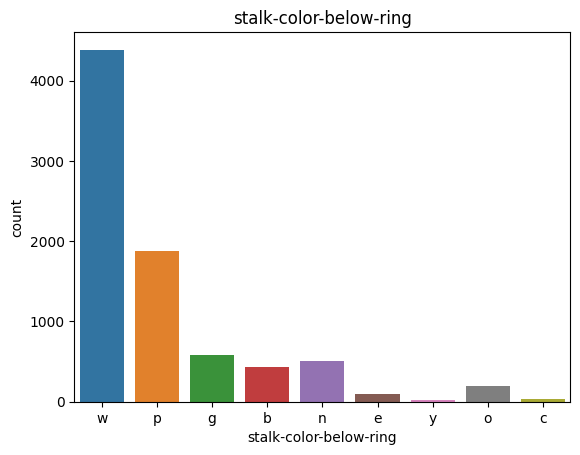

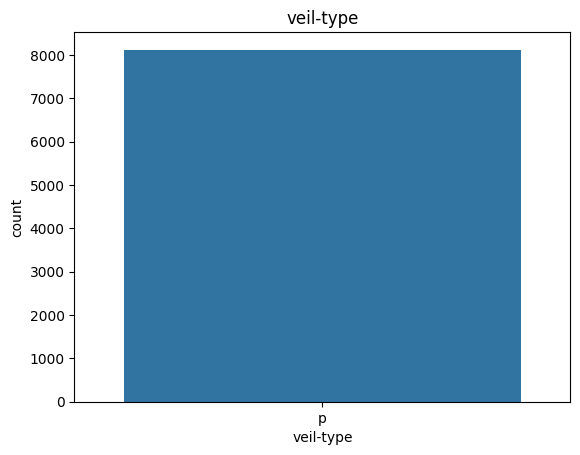

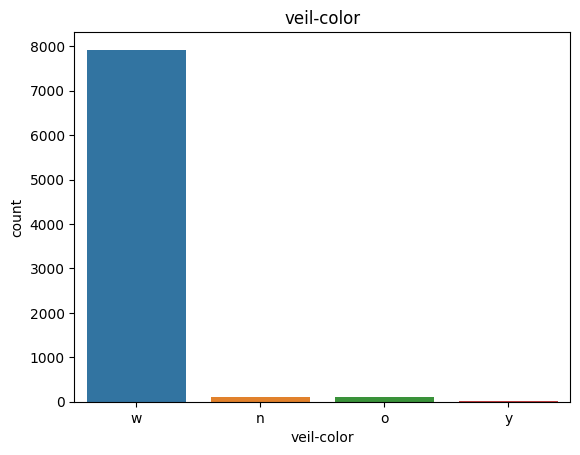

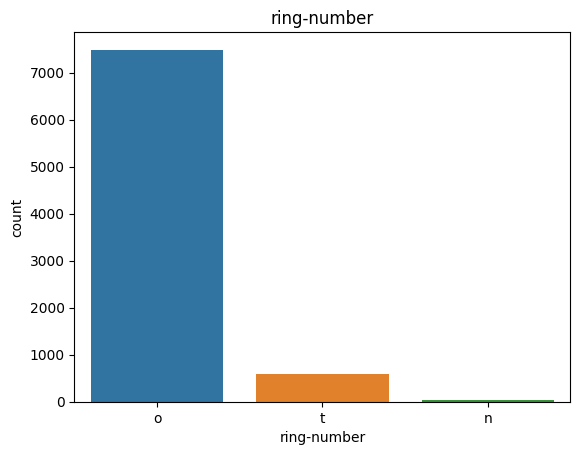

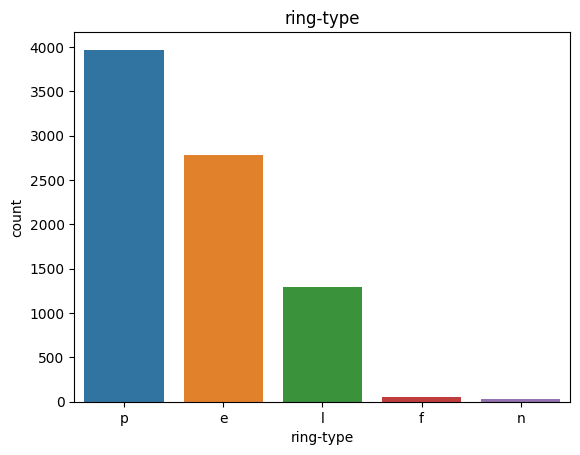

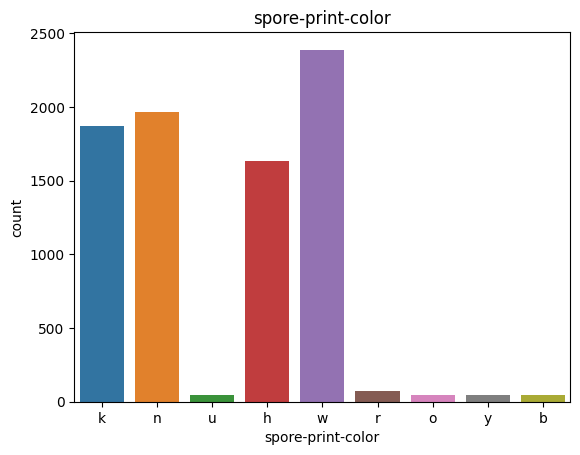

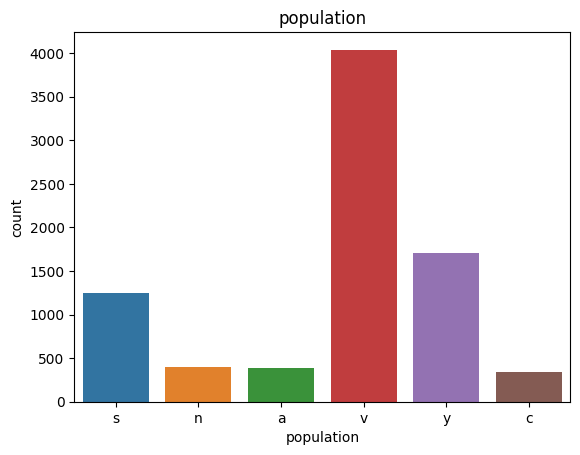

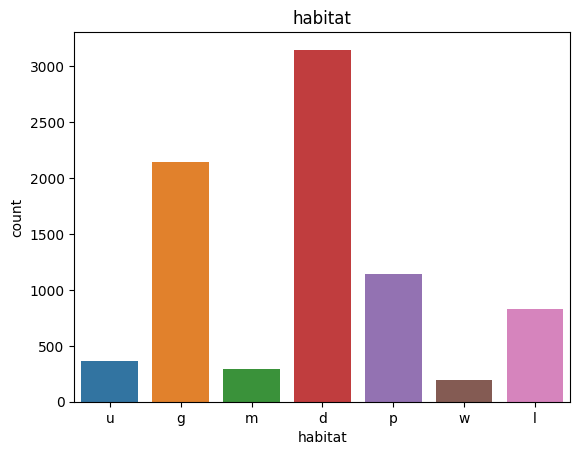

In [14]:
for feature in df.columns:
  sns.countplot(data=df, x=df[feature], hue=feature)
  plt.title(feature)
  plt.show()

In [15]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


In [16]:
df['habitat'].value_counts()

,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in df.columns:
  df[feature] = le.fit_transform(df[feature])

In [20]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<ipython-input-24-4dc92f30cd93>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'cap-surface'}>,
        <Axes: title={'center': 'cap-color'}>,
        <Axes: title={'center': 'bruises'}>],
       [<Axes: title={'center': 'odor'}>,
        <Axes: title={'center': 'gill-attachment'}>,
        <Axes: title={'center': 'gill-spacing'}>,
        <Axes: title={'center': 'gill-size'}>,
        <Axes: title={'center': 'gill-color'}>],
       [<Axes: title={'center': 'stalk-shape'}>,
        <Axes: title={'center': 'stalk-root'}>,
        <Axes: title={'center': 'stalk-surface-above-ring'}>,
        <Axes: title={'center': 'stalk-surface-below-ring'}>,
        <Axes: title={'center': 'stalk-color-above-ring'}>],
       [<Axes: title={'center': 'stalk-color-below-ring'}>,
        <Axes: title={'center': 'veil-type'}>,
        <Axes: title={'center': 'veil-color'}>,
        <Axes: title={'center': 'ring-number'}>,
        <Axes: title={'center': 'ring-typ

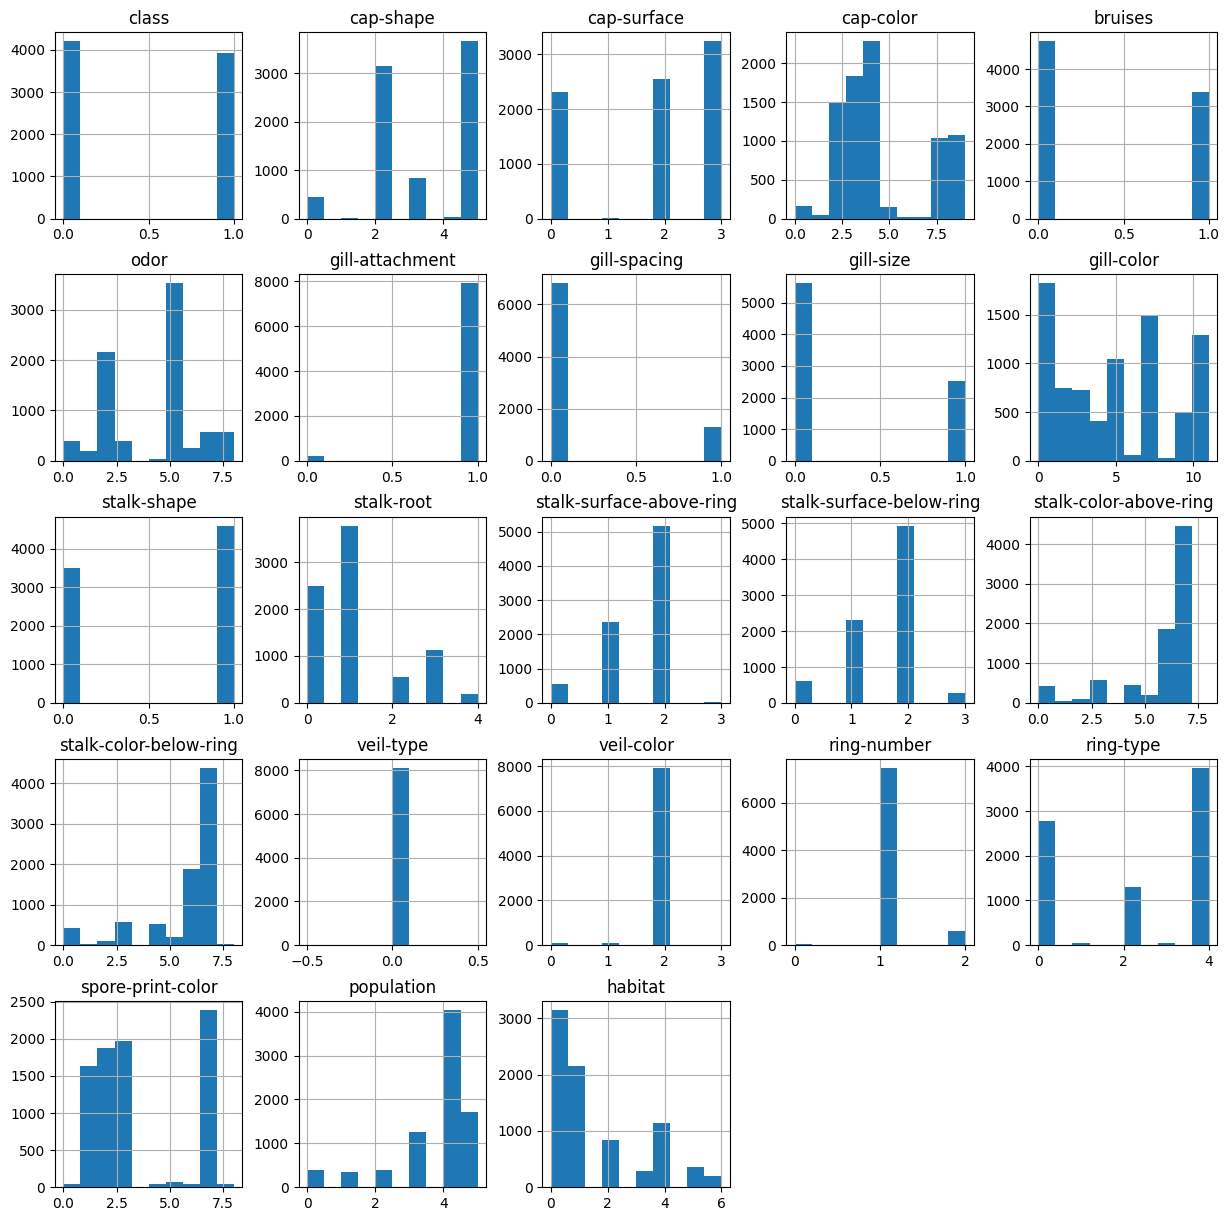

In [24]:
ax = plt.figure(figsize=(15,15))
df.hist(ax=ax)

In [25]:
X = df.drop(columns='class')
y = df['class']

In [26]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=69)

In [32]:
X_train.shape[1], y_train.shape

(22, (6499,))

In [29]:
## if multiclass then convert the target to 2D
## y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [43]:
model = Sequential()
model.add(Dense(units = 32, activation='relu', input_shape = (X_train.shape[1],)))
model.add(Dense(units = 32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=90)



In [46]:
model.fit(X_train, y_train, batch_size = 500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
11/11 - 9s - 809ms/step - accuracy: 0.5159 - loss: 0.9495 - val_accuracy: 0.7062 - val_loss: 0.6004
Epoch 2/100
11/11 - 0s - 13ms/step - accuracy: 0.6018 - loss: 0.7199 - val_accuracy: 0.7377 - val_loss: 0.5487
Epoch 3/100
11/11 - 0s - 9ms/step - accuracy: 0.6553 - loss: 0.6258 - val_accuracy: 0.7600 - val_loss: 0.5173
Epoch 4/100
11/11 - 0s - 9ms/step - accuracy: 0.6919 - loss: 0.5877 - val_accuracy: 0.7854 - val_loss: 0.4814
Epoch 5/100
11/11 - 0s - 12ms/step - accuracy: 0.7253 - loss: 0.5517 - val_accuracy: 0.8092 - val_loss: 0.4492
Epoch 6/100
11/11 - 0s - 12ms/step - accuracy: 0.7634 - loss: 0.5042 - val_accuracy: 0.8308 - val_loss: 0.4129
Epoch 7/100
11/11 - 0s - 9ms/step - accuracy: 0.7836 - loss: 0.4809 - val_accuracy: 0.8454 - val_loss: 0.3782
Epoch 8/100
11/11 - 0s - 12ms/step - accuracy: 0.7971 - loss: 0.4508 - val_accuracy: 0.8654 - val_loss: 0.3420
Epoch 9/100
11/11 - 0s - 9ms/step - accuracy: 0.8182 - loss: 0.4248 - val_accuracy: 0.8792 - val_loss: 0.3136
Epoc

In [58]:
prediction = model.predict(X_test)
prediction

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[5.0389051e-04],
       [7.6716992e-12],
       [1.0000000e+00],
       ...,
       [2.8897622e-08],
       [1.0000000e+00],
       [3.0837962e-03]], dtype=float32)

In [65]:
prediction = (prediction >= 0.5).astype(int)
prediction

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
cm

array([[840,   0],
       [  8, 777]])

In [70]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9950769230769231

Text(50.722222222222214, 0.5, 'actual')

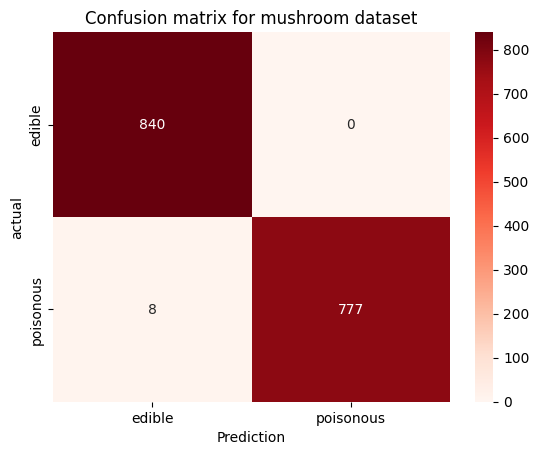

In [72]:
labels = ['edible','poisonous']
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',xticklabels=labels, yticklabels=labels)
ax.set_title("Confusion matrix for mushroom dataset")
ax.set_xlabel("Prediction")
ax.set_ylabel("actual")